[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# MultiMin: Quickstart

This notebook provides a quick introduction to the package

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [73]:
import os
import matplotlib.pyplot as plt
os.makedirs('gallery', exist_ok=True)
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import numpy as np
import multimin as mn
import warnings

deg = np.pi/180

warnings.filterwarnings("ignore")
np.random.seed(1)

## Roundtrip test

In this test, we will first generate a synthetic dataset using a CMND, and then we will fit this data.

Parameters of the Multivariate Gaussian Distribution:

In [75]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)

Create the distribution object:

In [76]:
CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

Generate random samples from this distribution:

In [77]:
data = CMND.rvs(5000)

Visualize the data:

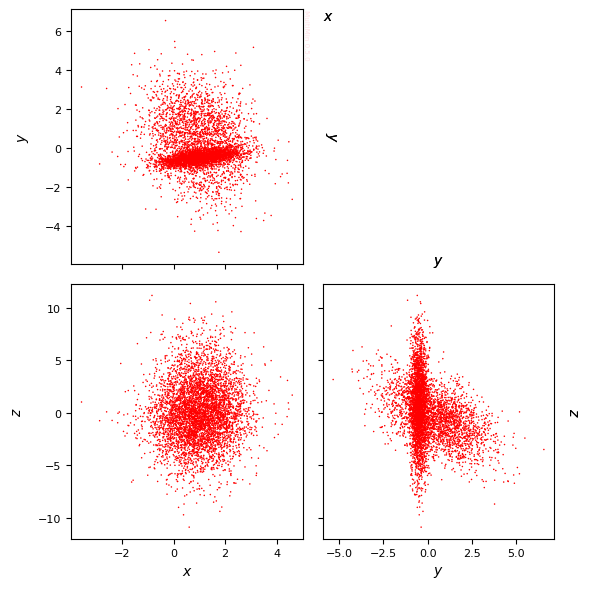

In [79]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
    z=dict(label=r"$z$",range=None),
)

G=mn.CornerPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')

sargs=dict(s=1.2,edgecolor='None',color='r')
hist=G.scatter_plot(data,**sargs)

plt.savefig('gallery/multimin_quickstart_1.png')


To fit the data, we first define a fit handler:

In [80]:
F = mn.FitCMND(Ngauss=1, Nvars=3)

Run the fitting procedure:

In [81]:
F.fit_data(data, advance=True)

Iterations:
Iter 0:
	Vars: [1.3, 0.3, 0.34, -1.8, -1.5, -0.33, 1.3, 1.3, 0.72]
	LogL/N: 5.882584392646054
Iter 1:
	Vars: [1.1, 0.11, 0.32, -1.9, -1.7, -0.63, 0.81, 0.88, 0.0081]
	LogL/N: 5.63726649714318
Iter 2:
	Vars: [0.99, -0.03, 0.12, -2.2, -1.9, -0.87, -0.34, 0.17, -0.78]
	LogL/N: 5.3502305197068925
Iter 3:
	Vars: [1, 0.005, 0.095, -2.3, -2, -0.9, -0.25, 0.13, -0.76]
	LogL/N: 5.345012739720842
Iter 4:
	Vars: [0.99, 0.0098, 0.09, -2.3, -2, -0.9, -0.23, 0.12, -0.75]
	LogL/N: 5.344517996760737
Iter 5:
	Vars: [0.99, 0.0098, 0.09, -2.3, -2, -0.9, -0.23, 0.12, -0.75]
	LogL/N: 5.344517996760737


Check the results:

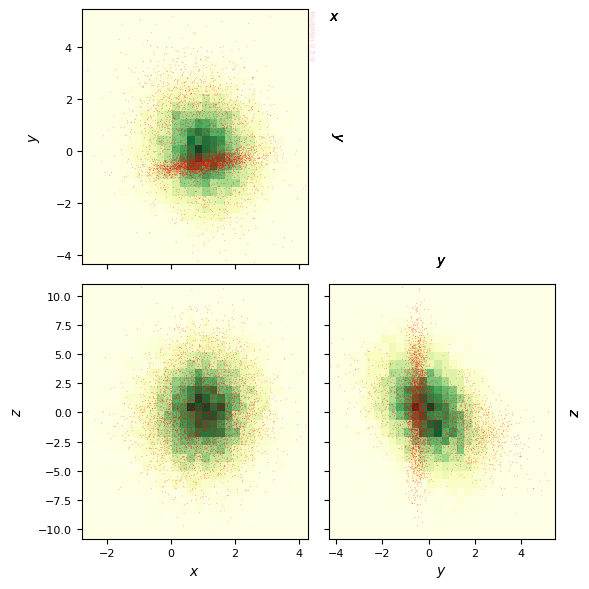

In [82]:
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/multimin_quickstart_2.png')


Not good. Let's try with two gaussians:

Iterations:
Iter 0:
	Vars: [0.5, 0.5, 1.4, 0.31, 0.29, 1.3, 0.28, 0.34, -2.1, -1.9, -0.54, -1.5, -1.1, -0.083, 1.7, 1.1, 0.58, 1, 1.4, 0.64]
	LogL/N: 5.834426731315825
Iter 1:
	Vars: [74, -0.52, 1.3, -0.071, 0.63, 0.64, 0.79, -0.5, -2, -2.6, -0.71, -1.7, -1.3, -0.99, 1.1, 0.46, 0.0051, 0.67, 1.1, -0.32]
	LogL/N: 5.398522569574078
Iter 2:
	Vars: [74, -0.33, 1.3, -0.33, 0.55, 0.76, 0.87, -0.69, -2.3, -3.3, -0.75, -1.8, -1.5, -1.2, 1.1, -0.026, -0.13, -0.094, 0.35, -1.3]
	LogL/N: 5.0778407588478585
Iter 3:
	Vars: [74, 1, 1.2, -0.43, 0.54, 0.88, 0.7, -0.58, -2.4, -3.6, -0.73, -2.1, -1.6, -1.3, 1.2, -0.087, -0.09, -0.47, 0.3, -1.3]
	LogL/N: 4.936589233298021
Iter 4:
	Vars: [74, 2.2, 1.1, -0.47, 0.59, 0.92, 0.58, -0.51, -2.4, -3.7, -0.71, -2.2, -1.7, -1.3, 1.2, -0.05, -0.057, -0.45, 0.27, -1.2]
	LogL/N: 4.916501369354868
Iter 5:
	Vars: [74, 2.8, 1, -0.48, 0.61, 0.95, 0.54, -0.48, -2.4, -3.7, -0.7, -2.2, -1.7, -1.3, 1.2, -0.03, -0.043, -0.44, 0.25, -1.2]
	LogL/N: 4.913896035099514
Iter 6:
	Va

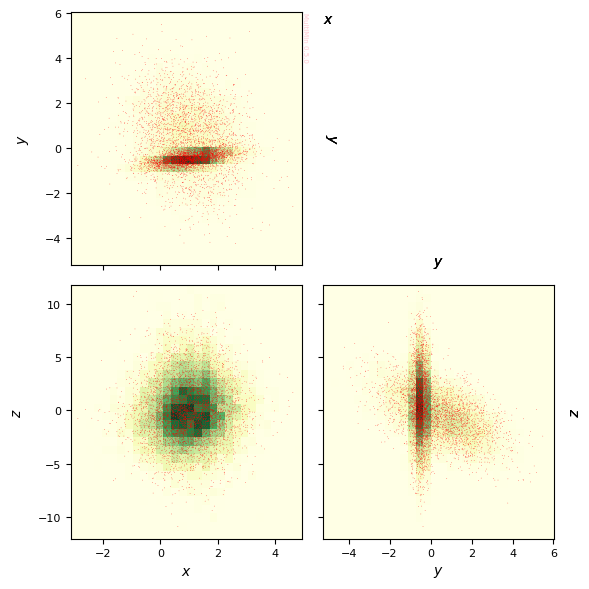

In [83]:
F = mn.FitCMND(Ngauss=2, Nvars=3)
F.fit_data(data, advance=True)
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/multimin_quickstart_3.png')


Check the initial and final distributions:

In [84]:
CMND.Sigmas, F.cmnd.Sigmas, F.cmnd.weights

(array([[[ 1.13293109, -0.33952005,  0.22372638],
         [-0.33952005,  2.28243647, -1.67599867],
         [ 0.22372638, -1.67599867,  4.31463244]],
 
        [[ 0.62190779,  0.10260604,  0.        ],
         [ 0.10260604,  0.05809221,  0.        ],
         [ 0.        ,  0.        , 10.89      ]]]),
 array([[[ 0.63478493,  0.10608086, -0.02930445],
         [ 0.10608086,  0.06070522, -0.01560267],
         [-0.02930445, -0.01560267, 11.05925591]],
 
        [[ 1.08184784, -0.34094425,  0.27209072],
         [-0.34094425,  2.37622957, -1.72527791],
         [ 0.27209072, -1.72527791,  4.4892195 ]]]),
 array([0.510264, 0.489736]))

For comparison, let's see the centers of the CMNDs, the original and the fitted one:

In [85]:
CMND.mus, F.cmnd.mus

(array([[ 1. ,  0.5, -0.5],
        [ 1. , -0.5,  0.5]]),
 array([[ 1.0249787 , -0.47994159,  0.61652341],
        [ 0.95797445,  0.51896196, -0.46414675]]))

Although the order is not the same the center almost coincide!

---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga